# Exercices : Probabilit√©s et statistiques

### Exercice 1

On se donne un r√©el strictement positif $\lambda$ et une suite $(X_n)_{n \geq 1}$ de variables binomiales :

$$
X_n \sim \mathcal{B}\left(n,\ \frac{\lambda}{n}\right)
\quad \text{et une variable de Poisson} \quad Y \sim \mathcal{P}(\lambda).
$$

On sait que pour tout $k \in \mathbb{N}$ :

$$
\lim_{n \to +\infty} \mathbb{P}(X_n = k) = \mathbb{P}(Y = k).
$$

Ce th√©or√®me ne nous dit pas si, pour un entier $n$ fix√©, $\mathbb{P}(X_n = k)$ est une bonne approximation de $\mathbb{P}(Y = k)$.

On se propose de faire une **√©tude num√©rique** pour le savoir et en tirer une **r√®gle empirique**.


a) √âcrire une fonction `B(n, Lambda)` qui calcule :
$b_k = \mathbb{P}(X_n = k)$ pour tout $k \in [0, n]$
et donne en sortie le vecteur :

$$
\mathbf{b} = [b_0,\ b_1,\ \dots,\ b_n].
$$

$$
\mathbb{P}(X_n = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

ou


$$
b_k = b_{k-1} \cdot \frac{n - k + 1}{k} \cdot \frac{p}{1 - p}
$$



b) √âcrire une fonction `P(n, Lambda)` qui calcule :
$p_k = \mathbb{P}(Y = k)$ pour tout $k \in [0, n]$
et donne en sortie :

$$
\mathbf{Y} = [p_0,\ p_1,\ \dots,\ p_n].
$$

$$
\mathbb{P}(Y = k) = \frac{\lambda^k}{k!} e^{-\lambda}
$$


c) Faire tracer les **diagrammes en barres** des valeurs :

* $F_{X_n}(k)$ (loi binomiale)
* $F_Y(k)$ (loi de Poisson)

pour $0 \leq k \leq 30$ dans les cas suivants :

* $\lambda = 1,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$
* $\lambda = 2,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$
* $\lambda = 4,\ n = 30,\ puis\ n = 300,\ puis\ n = 1000$


d) **Conclusion ?** (visuelle et num√©rique)




#### Correction a) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb, exp, factorial

# a) Loi binomiale : B(n, Œª) retourne b_k = P(X‚Çô = k)
def B(n, Lambda):
    p = Lambda / n
    b = [comb(n, k) * (p**k) * ((1 - p)**(n - k)) for k in range(n + 1)]
    return b

# Version optimis√© 
def B(n, Lambda):
    p = Lambda / n
    q = 1 - p

    b = [q**n]  # b‚ÇÄ = (1 - p)^n
    for k in range(1, n + 1):
        next_b = b[-1] * (n - k + 1) / k * (p / q)
        b.append(next_b)
    return b



#### Correction b) 

In [2]:
# b) Loi de Poisson : P(n, Œª) retourne p_k = P(Y = k)
def P_kmax(k_max, Lambda):
    p = [exp(-Lambda) * Lambda**k / factorial(k) for k in range(k_max + 1)]
    return p



#### Correction c) 

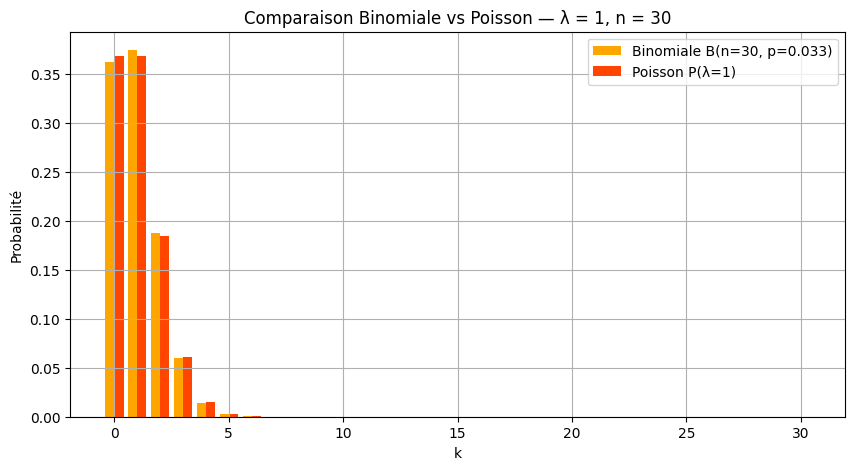

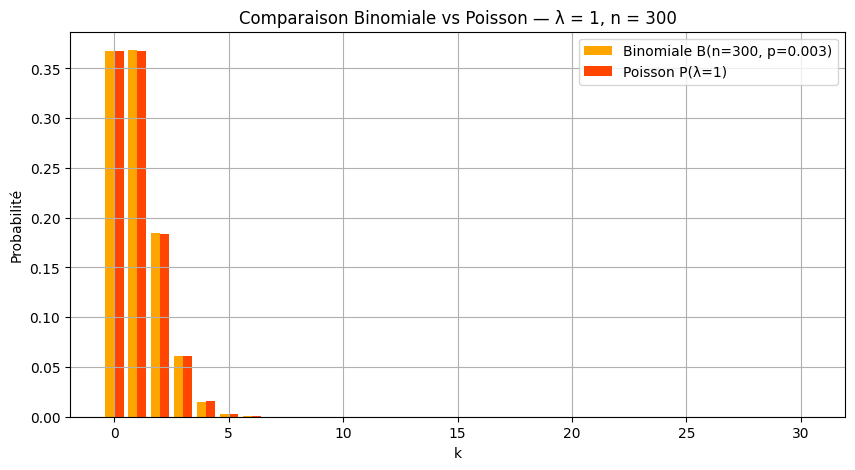

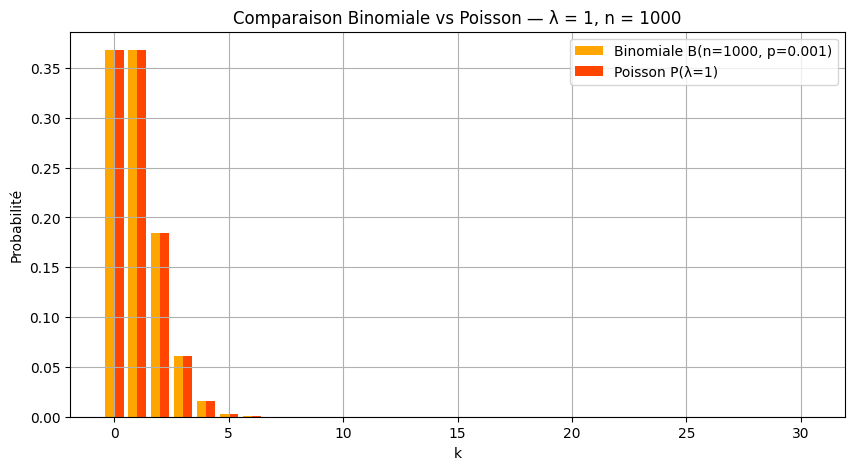

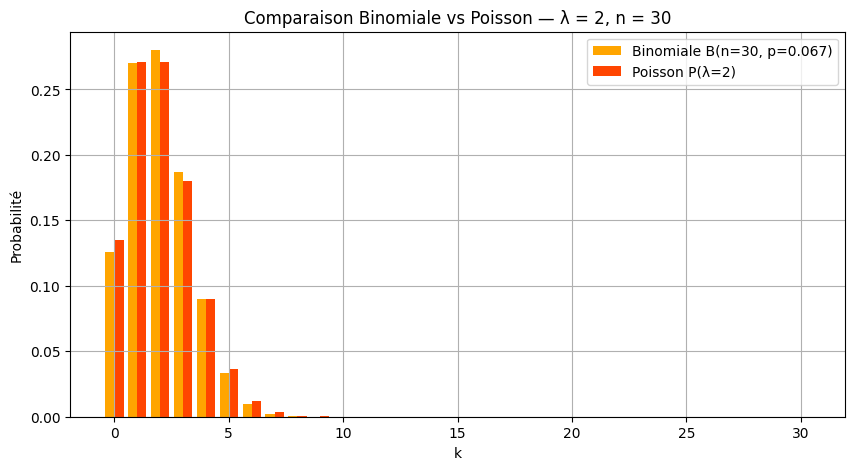

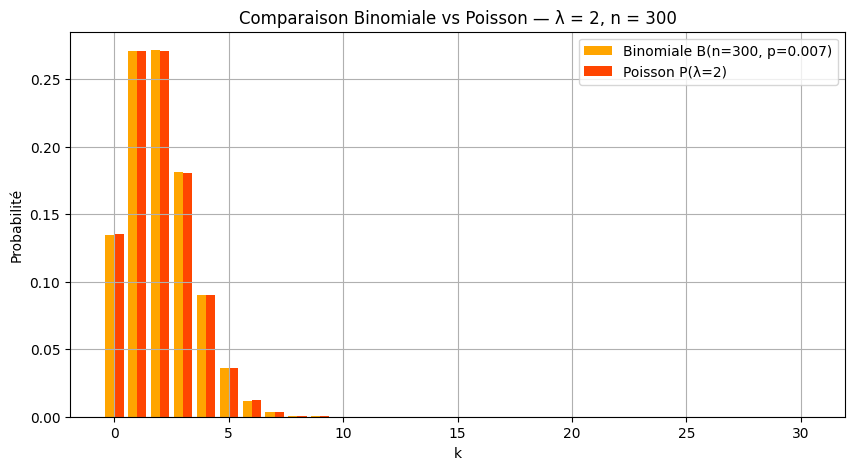

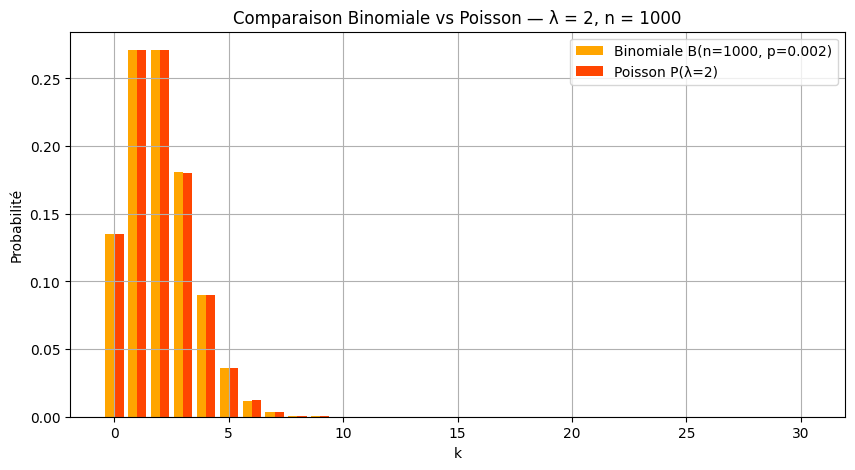

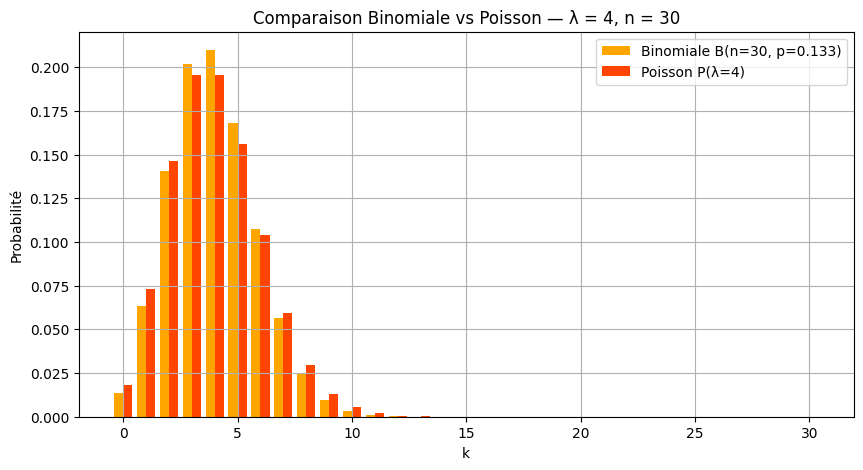

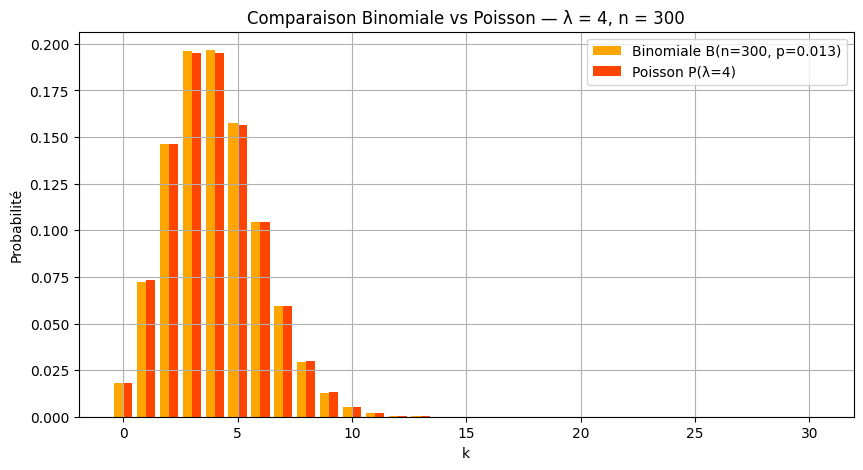

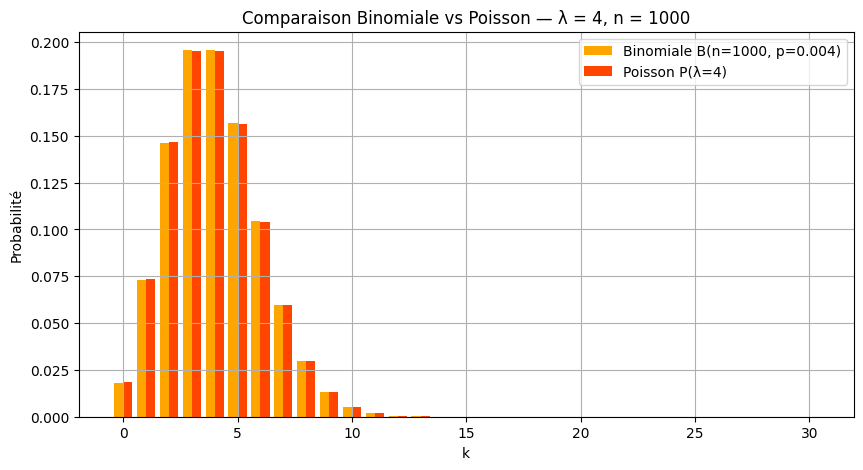

In [3]:
# c) Fonction de trac√© comparatif
def plot_distributions(n, lam, k_max=30):
    x = np.arange(0, k_max + 1)
    b_vals = B(n, lam)[:k_max + 1]
    p_vals = P_kmax(k_max, lam)

    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.2, b_vals, width=0.4, label=f'Binomiale B(n={n}, p={lam/n:.3f})', color='orange')
    plt.bar(x + 0.2, p_vals, width=0.4, label=f'Poisson P(Œª={lam})', color='orangered')
    plt.title(f'Comparaison Binomiale vs Poisson ‚Äî Œª = {lam}, n = {n}')
    plt.xlabel('k')
    plt.ylabel('Probabilit√©')
    plt.legend()
    plt.grid(True)
    plt.show()


params = [
    (1, 30), (1, 300), (1, 1000),
    (2, 30), (2, 300), (2, 1000),
    (4, 30), (4, 300), (4, 1000),
]

for lam, n in params:
    plot_distributions(n, lam, k_max=30)
    

##### **Conclusions g√©n√©rales sur l‚Äôapproximation de la loi binomiale par la loi de Poisson** :

##### üîπ 1. **Quand $n$ augmente, l‚Äô√©cart diminue**

* Pour un **$\lambda$ fix√©**, plus **$n$** est grand, plus les histogrammes de la **binomiale** et de la **Poisson** se **confondent**.
* Cela confirme le th√©or√®me de convergence :

  $$
  \text{Si } X_n \sim \mathcal{B}\left(n,\ \frac{\lambda}{n}\right), \quad \text{alors } X_n \xrightarrow[]{\mathcal{L}} \mathcal{P}(\lambda)
  $$

##### üîπ 2. **La qualit√© de l‚Äôapproximation d√©pend de $\lambda$** aussi :

* Pour un **$n$ fix√©**, l‚Äôapproximation est **meilleure pour les petits $\lambda$**.
* Si $\lambda$ augmente trop (ex. $\lambda = 4$) et que $n$ reste petit, la binomiale est **plus dispers√©e** que la Poisson.


##### üîπ 3. **R√®gle empirique** :

On peut retenir la **r√®gle classique** :

> ‚úÖ La loi de Poisson est une **bonne approximation** de la loi binomiale $\mathcal{B}(n, p)$
> quand $n$ est **grand**, $p$ est **petit**, et $\lambda = np$ est **mod√©r√©** (typiquement $\lambda < 5$).


### Exercice 2

Supposons avoir import√© la biblioth√®que `numpy.random` avec le raccourci `rd`.
On admet que la fonction `rd.random()` simule une variable uniforme sur l‚Äôintervalle $[0, 1[$.

On donne la fonction :

```python
def Attend(p):
    q = 1 - p
    Y = 1
    while rd.random() < q:
        Y += 1
    return Y
```

On suppose que $p$ est un r√©el de l‚Äôintervalle $]0, 1[$.


a) Quelle est la probabilit√© que l‚Äôinstruction `Attend(p)` retourne :

* le nombre **0** ?
* le nombre **1** ?
* le nombre **2** ?

b) Si $n$ est un entier positif, quelle est la probabilit√© que l‚Äôit√©ration

```python
while rd.random() < q:
    Y += 1
```

se r√©p√®te **plus de $n$** fois ?
Quelle est la probabilit√© que cette fonction **"plante"** (c‚Äôest-√†-dire qu‚Äôelle se r√©p√®te ind√©finiment) ?


c) Quelle variable al√©atoire simule l‚Äôinstruction `Attend(p)` ?


#### Correction a)

Chaque it√©ration de la boucle a :

* une **probabilit√© $q$** de continuer (succ√®s de la condition)
* une **probabilit√© $p$** d‚Äôarr√™ter (√©chec de la condition)

C‚Äôest exactement le **mod√®le d'une loi g√©om√©trique**.

---

##### - $Y = 0$ : La r√©ponse est 0.

---

##### - $Y = 1$ :

Cela veut dire que la boucle **ne se r√©p√®te pas** du tout.
C‚Äôest-√†-dire que la toute premi√®re condition `rd.random() < q` **√©choue** d√®s le premier tirage.

Donc :

$$
\mathbb{P}(Y = 1) = \mathbb{P}(\text{premier tirage} \geq q) = p
$$

---

##### - $Y = 2$ :

Cela veut dire que la boucle **se r√©p√®te 1 fois** puis s‚Äôarr√™te.

Il faut donc :

* 1er tirage : $< q$ (proba $q$)
* 2e tirage : $\geq q$ (proba $p$)

Donc :

$$
\mathbb{P}(Y = 2) = q \cdot p
$$


---

##### - $Y = 3$ :

La boucle se r√©p√®te deux fois, puis s'arr√™te.

$$
\mathbb{P}(Y = 3) = q \cdot q \cdot p = q^2 \cdot p
$$




In [4]:
print("""Start
 ‚îú‚îÄ‚îÄ p        ‚Üí  Y = 1       (ùëÉ = p)
 ‚îî‚îÄ‚îÄ q
     ‚îú‚îÄ‚îÄ p    ‚Üí  Y = 2       (ùëÉ = q √ó p)
     ‚îî‚îÄ‚îÄ q    ‚Üí  Y ‚â• 3       (ùëÉ = q¬≤)""")

Start
 ‚îú‚îÄ‚îÄ p        ‚Üí  Y = 1       (ùëÉ = p)
 ‚îî‚îÄ‚îÄ q
     ‚îú‚îÄ‚îÄ p    ‚Üí  Y = 2       (ùëÉ = q √ó p)
     ‚îî‚îÄ‚îÄ q    ‚Üí  Y ‚â• 3       (ùëÉ = q¬≤)


#### Correction b)

Cela veut dire que les $n$ premiers tirages sont tous $< q$, donc :

$$
\mathbb{P}(Y > n) = q^{n}
$$

---

##### Et si la boucle ne s'arr√™te jamais ?

Ce serait :

$$
\lim_{n \to \infty} \mathbb{P}(Y > n) = \lim_{n \to \infty} q^n = 0
$$

Puisque $0 < q < 1$, alors $q^n \to 0$.

üîπ **Donc la fonction ne ‚Äúplante‚Äù jamais** avec probabilit√© 1.
Autrement dit, **la probabilit√© d‚Äôun nombre infini de r√©p√©titions est nulle.**

---



#### Correction c)

* $Y$ suit une loi g√©om√©trique de param√®tre p.
* $\mathbb{P}(Y = k) = q^{k - 1} \cdot p$, pour $k = 1, 2, 3, \dots$
* $\mathbb{P}(Y > n) = q^n$
* La fonction ne boucle jamais √† l‚Äôinfini (la probabilit√© d‚Äôarr√™t est 1).

### Exercice 3 : Analyse d'une s√©rie statistique

Soit une variable al√©atoire `X` g√©n√©r√©e dans un environnement Python.

```python
X = np.random.normal(0, 4, 100)
X = np.abs(np.floor(X))
```

a) Repr√©senter graphiquement `X` au moyen de l‚Äôinstruction suivante :

b) Obtenir l‚Äô√©tendue et les quartiles de `X`.

c) √Ä l‚Äôaide de `np.cumsum` et `np.sum`, construire une variable `Y` qui donne les **sommes cumul√©es** des valeurs tri√©es de `X`.
* Normaliser `Y` pour que la **derni√®re valeur** soit √©gale √† 1.
* Repr√©senter graphiquement `Y` avec plt.bar(...)
* Retrouver **l‚Äô√©tendue** et les **quartiles** de `X` √† partir de `Y`.

Dans un contexte de math√©matiques appliqu√©es, on utilisera plut√¥t au lieu de X.sort() :

```python
donnees = pd.DataFrame({"X": X})
donnees = donnees.sort_values()
```



In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# G√©n√©ration de X : valeurs normales centr√©es r√©duites, rendues positives et enti√®res
X = np.random.normal(0, 4, 100)
X = np.abs(np.floor(X))


#### Correction a) 

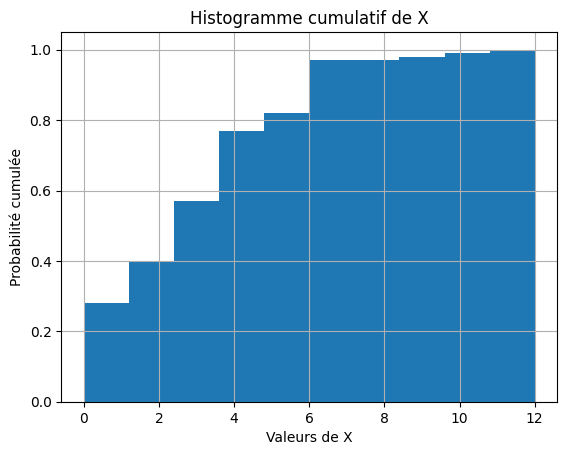

In [6]:
plt.hist(X, cumulative=True, density=True)
plt.title("Histogramme cumulatif de X")
plt.xlabel("Valeurs de X")
plt.ylabel("Probabilit√© cumul√©e")
plt.grid(True)
plt.show()


#### Correction b) 

In [7]:
etendue = np.ptp(X)  # plage (max - min) ou np.max(X) - np.min(X)
quartiles = np.percentile(X, [25, 50, 75])
print("√âtendue :", etendue)
print("Quartiles (q1, q2, q3) :", quartiles)

# OU

donnees = pd.DataFrame({"X": X})
stats = donnees.describe()
q3 = stats.loc["75%", "X"]
q2 = stats.loc["50%", "X"]
q1 = stats.loc["25%", "X"]
inter = q3 - q1
print("√âtendue :", np.max(X) - np.min(X))
print("Quartiles (q1, q2, q3) :", (q1, q2, q3))

√âtendue : 12.0
Quartiles (q1, q2, q3) : [1. 3. 4.]
√âtendue : 12.0
Quartiles (q1, q2, q3) : (1.0, 3.0, 4.0)


#### Correction c) 

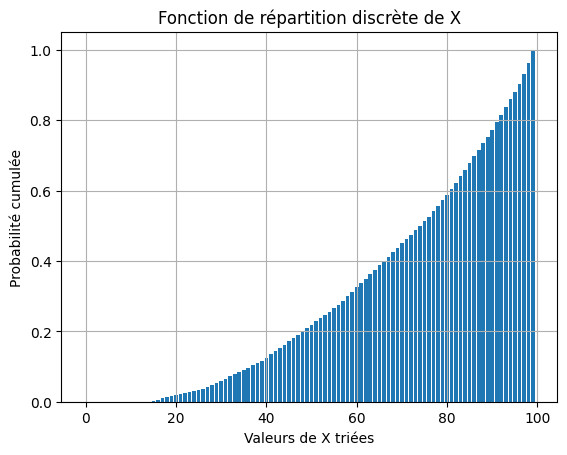

q1 : 3.0
q2 : 4.0
q3 : 6.0


In [8]:
# donnees = pd.DataFrame({"X": X})  # ou seulement X.sort()
# donnees = donnees.sort_values("X")

X.sort()
Y = np.cumsum(X) / np.sum(X)

# Repr√©sentation graphique
plt.bar(range(len(Y)), Y)
plt.title("Fonction de r√©partition discr√®te de X")
plt.xlabel("Valeurs de X tri√©es")
plt.ylabel("Probabilit√© cumul√©e")
plt.grid(True)
plt.show()

# Retrouver √©tendue et quartiles √† partir de Y
# On cherche l‚Äôindice o√π la somme cumul√©e atteint 25 %, 50 %, 75 %. (pseudo-quartiles)

i_q1 = np.argmax(Y >= 0.25)
i_q2 = np.argmax(Y >= 0.50)
i_q3 = np.argmax(Y >= 0.75)

print("q1 :", X[i_q1])
print("q2 :", X[i_q2])
print("q3 :", X[i_q3])

### Exercice 4 

```python
n = 1000
X = np.floor(rd.normal(10, 2, n))
```

**a)**
Obtenir la matrice
$M = [m_i, e_i]$
des **modalit√©s-effectifs** dans l‚Äôordre croissant des $e_i$,
puis la matrice
$M_1 = [m_i, f_i]$
o√π $f_i = \frac{e_i}{n}$ est la **fr√©quence** de la modalit√© $m_i$.

**b)**
Repr√©senter graphiquement les $e_i$ (et/ou $f_i$) en fonction de $m_i$ au moyen de la m√©thode `plot.bar()`.

> *On constate qu‚Äôen g√©n√©ral, une des modalit√©s appara√Æt plus souvent que les autres, on l‚Äôappelle le **mode**.*

**c)**
Repr√©senter les $e_i$ (et/ou les $f_i$) **cumul√©s croissants** en fonction de $m_i$
au moyen de la m√©thode `plot.bar()`.

> *(Remarque : ce sont les $e_i$ qui sont ordonn√©s croissants ‚Äî pas les $m_i$ ‚Äî puis cumul√©s.)*

**d)**
Repr√©senter les $e_i$ (et/ou les $f_i$) **cumul√©s** en fonction de $m_i$ **croissants** au moyen de la m√©thode `plot.bar()`.


In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# G√©n√©ration des donn√©es
n = 1000
X = np.floor(np.random.normal(10, 2, n))

#### Correction a)

In [10]:
valeurs, effectifs = np.unique(X, return_counts=True)
frequences = effectifs / n

df = pd.DataFrame({'mi': valeurs, 'ei': effectifs, 'fi': frequences})
df_sorted_by_ei = df.sort_values(by='ei')  # tri selon effectif croissant
df_sorted_by_ei

mi   ei     fi
0    2.0    1  0.001
1    3.0    2  0.002
2    4.0    5  0.005
13  15.0    5  0.005
3    5.0   14  0.014
12  14.0   20  0.020
11  13.0   45  0.045
4    6.0   46  0.046
5    7.0   87  0.087
10  12.0   96  0.096
6    8.0  139  0.139
9   11.0  150  0.150
7    9.0  189  0.189
8   10.0  201  0.201

#### Correction b)

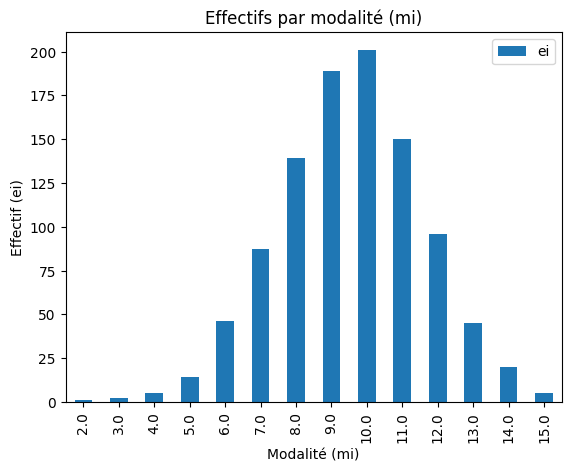

In [11]:
df.plot.bar(x='mi', y='ei', title="Effectifs par modalit√© (mi)")
plt.xlabel("Modalit√© (mi)")
plt.ylabel("Effectif (ei)")
plt.show()



#### Correction c)

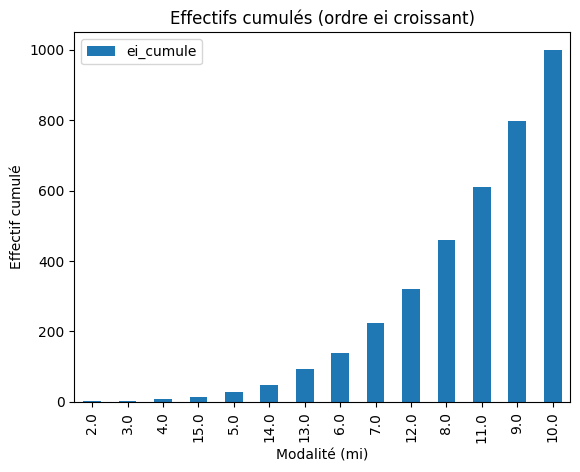

In [12]:
df_sorted_by_ei['ei_cumule'] = df_sorted_by_ei['ei'].cumsum()
df_sorted_by_ei.plot.bar(x='mi', y='ei_cumule', title="Effectifs cumul√©s (ordre ei croissant)")
plt.xlabel("Modalit√© (mi)")
plt.ylabel("Effectif cumul√©")
plt.show()


#### Correction d)

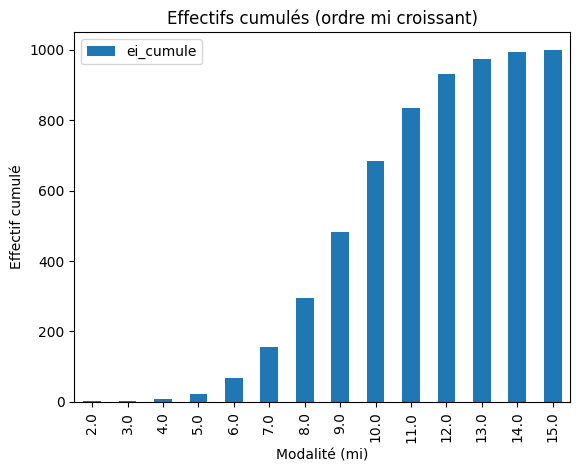

In [13]:
df_sorted_by_mi = df.sort_values(by='mi')
df_sorted_by_mi['ei_cumule'] = df_sorted_by_mi['ei'].cumsum()
df_sorted_by_mi.plot.bar(x='mi', y='ei_cumule', title="Effectifs cumul√©s (ordre mi croissant)")
plt.xlabel("Modalit√© (mi)")
plt.ylabel("Effectif cumul√©")
plt.show()

### Exercice 5

a) √Ä l‚Äôaide de `X = rd.binomial(...)`, simuler **40 s√©ries de 6 lancers** d‚Äôune pi√®ce √©quilibr√©e.
Affecter √† `X[k]` le nombre de piles obtenus dans la k-i√®me s√©rie.
Afficher l‚Äô**histogramme** du vecteur `X`, avec l‚Äôoption `density=True`.

**b)** D√©finir une fonction `binomiale(p, n, k)` qui retourne la **valeur th√©orique** de la loi binomiale :

* $p$ : probabilit√© de succ√®s
* $n$ : nombre d‚Äôessais
* $k$ : nombre de succ√®s

> On pourra utiliser `np.prod` et `np.arange` pour calculer les **factorielles**.

c) Superposer les r√©sultats de la fonction `binomiale`, avec les param√®tres $(6, \frac{1}{2})$, √† l‚Äôhistogramme pr√©c√©dent.

> V√©rifier que ce graphique **se superpose bien** √† celui g√©n√©r√© avec `density=True`.



In [14]:
import numpy as np
import matplotlib.pyplot as plt

#### Correction a)

(array([0.   , 0.1  , 0.15 , 0.5  , 0.125, 0.125, 0.   ]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <BarContainer object of 7 artists>)

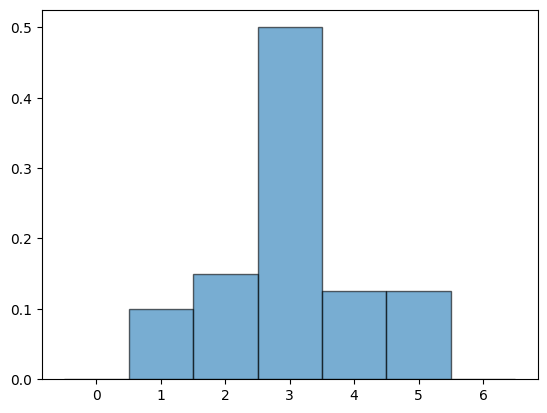

In [15]:
n = 6
p = 0.5
taille = 40
X = np.random.binomial(n, p, taille)

# Histogramme avec density=True
plt.hist(X, bins=np.arange(n+2)-0.5, density=True, edgecolor='black', alpha=0.6, label="Histogramme (exp√©rimental)")

#### Correction b)

In [16]:
def binomiale(p, n, k):
    # Calcul de n! / (k!(n-k)!)
    fact_n = np.prod(np.arange(1, n+1))
    fact_k = np.prod(np.arange(1, k+1)) if k > 0 else 1
    fact_nk = np.prod(np.arange(1, n-k+1)) if (n-k) > 0 else 1
    coeff_binom = fact_n / (fact_k * fact_nk)
    return coeff_binom * (p**k) * ((1 - p)**(n - k))


#### Correction c)

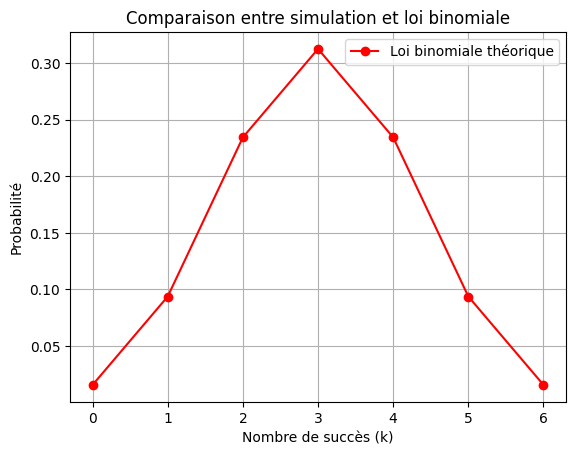

In [17]:
# c) Superposition de la loi binomiale th√©orique
k_vals = np.arange(0, n+1)
theorique = [binomiale(p, n, k) for k in k_vals]

plt.plot(k_vals, theorique, 'ro-', label="Loi binomiale th√©orique")
plt.xlabel("Nombre de succ√®s (k)")
plt.ylabel("Probabilit√©")
plt.title("Comparaison entre simulation et loi binomiale")
plt.legend()
plt.grid(True)
plt.show()


### Exercice 6

* √âcrire une suite d‚Äôinstructions qui affecte √† un vecteur ligne
  $X = [x_1, x_2, \dots, x_{1000}]$
  une suite de **1000 entiers** uniform√©ment r√©partis entre **1 et 10**
  (chaque $x_i$ est la r√©alisation d‚Äôune variable uniforme sur $[1, 10]$).

* √âcrire deux instructions qui **calculent et affichent** :

  * la **moyenne** $\bar{x}$
  * l‚Äô**√©cart-type empirique** $\sigma_{n-1}(X)$


In [18]:
import numpy as np

# G√©n√©ration d'un vecteur de 1000 entiers entre 1 et 10 inclus
X = np.random.randint(1, 11, 1000)

# Calcul et affichage de la moyenne
print("Moyenne de X :", np.mean(X))

# Calcul et affichage de l'√©cart-type empirique (ddof=1 pour n-1)
print("√âcart-type empirique de X :", np.std(X, ddof=1))

Moyenne de X : 5.623
√âcart-type empirique de X : 2.874566773295436


### Exercice 7

On consid√®re :

* Une variable al√©atoire $X$ suivant une loi de **Poisson de param√®tre 2**.
* Une variable al√©atoire $Y$, dont la loi conditionnelle sachant que $X = k$ est une loi de **Poisson de param√®tre $k$**.


1. **Simulations :**
   √âcrire une suite de deux instructions qui effectue **1000 r√©alisations ind√©pendantes** du couple $(X, Y)$ et conserve les r√©sultats dans deux vecteurs `X` et `Y` de taille $1 \times 1000$.

2. **Exploration des valeurs :**
   Trouver :

   * le **maximum** $\ell$ de `X`,
   * le **maximum** $m$ de `Y`,
   * cr√©er un vecteur `x = np.arange(0, ‚Ñì+1)` contenant toutes les valeurs prises par `X`,
   * faire de m√™me pour `Y`.

3. **Table de contingence :**
   Construire la **table de contingence** du couple $(X, Y)$, c‚Äôest-√†-dire une **matrice $F$** contenant les **fr√©quences** $p_{i,j}$ des couples observ√©s.

4. **Fr√©quences marginales :**
   Trouver les **fr√©quences marginales** de `X` et de `Y`.

5. **R√©gression lin√©aire et corr√©lation :**
   Trouver :

   * la **droite de r√©gression de `Y` en `X`**,
   * le **coefficient de corr√©lation** entre `X` et `Y`.

   Pour cela, il faudra calculer :

   * $\bar{X}, \bar{Y}$
   * $\mathbb{V}(X), \mathbb{V}(Y)$
   * $\operatorname{cov}(X, Y)$

   Deux m√©thodes possibles :

   * √† partir des **donn√©es brutes** (vecteurs),
   * √† partir de la **table de contingence** et des **lois marginales**.


‚ö†Ô∏è Attention :

* `np.mean` ne prend pas de param√®tre `weights`.

  * Pour faire une moyenne pond√©r√©e, on doit passer par `np.average(...)`.
* `np.var` non plus ne prend pas de `weights`.

  * Il faut donc programmer une fonction manuelle :

    ```python
    def variance(values, weights):
        ...
    ```



#### Correction 1)

In [19]:
import numpy as np
import pandas as pd

# Simulation
n = 1000
X = np.random.poisson(2, n)
Y = np.array([np.random.poisson(k) for k in X])

#### Correction 2)

In [20]:
l = np.max(X)  # ‚Ñì
m = np.max(Y)  # m

x_vals = np.arange(0, l + 1)
y_vals = np.arange(0, m + 1)

#### Correction 3)

In [21]:
# Cr√©ation d‚Äôun DataFrame pour construire la table
df = pd.DataFrame({"X": X, "Y": Y})

# Table de contingence brute (effectifs)
contingency_table = pd.crosstab(df["X"], df["Y"])

#Ou
# contingency_table = np.zeros((l+1,m+1))
# for k in range(n):
#     contingency_table[X[k],Y[k]] += 1

# Conversion en tableau de fr√©quences (p_ij)
F = contingency_table / n

#### Correction 4)

In [22]:
# Fr√©quences marginales de X (somme sur les colonnes)
p_X = F.sum(axis=1)

# Fr√©quences marginales de Y (somme sur les lignes)
p_Y = F.sum(axis=0)

#### Correction 5)

In [23]:
# # D√©finir la fonction de variance pond√©r√©e
# def variance(values, weights):
#     mean = np.average(values, weights=weights)
#     return np.average((values - mean) ** 2, weights=weights)

# # Moyennes
# mean_X = np.average(p_X.index, weights=p_X.values)
# mean_Y = np.average(p_Y.index, weights=p_Y.values)

# # Variances
# var_X = variance(p_X.index.to_numpy(), p_X.values)
# var_Y = variance(p_Y.index.to_numpy(), p_Y.values)

# Moyennes
mean_X = np.sum(p_X.index * p_X.values)
mean_Y = np.sum(p_Y.index * p_Y.values)

# Variances
var_X = np.sum((p_X.index - mean_X) ** 2 * p_X.values)
var_Y = np.sum((p_Y.index - mean_Y) ** 2 * p_Y.values)

# Covariance
cov_XY = 0
for i in F.index:
    for j in F.columns:
        cov_XY += (i - mean_X) * (j - mean_Y) * F.loc[i, j]
        
#OU
cov_XY = np.cov(X,Y,ddof=0)[0,1]


# Coefficient de r√©gression de Y en X : a = cov(X, Y) / var(X)
a = cov_XY / var_X
b = mean_Y - a * mean_X

# Coefficient de corr√©lation lin√©aire
r = cov_XY / (np.sqrt(var_X) * np.sqrt(var_Y))

print(f"R√©gression Y = {a:.3f} * X + {b:.3f}")
print(f"Corr√©lation r = {r:.3f}")

R√©gression Y = 1.040 * X + -0.053
Corr√©lation r = 0.749


### Exercice 7 : Simulation de la loi normale centr√©e r√©duite

Apr√®s importation, la fonction `rd.normal(0,1)` permet de simuler des valeurs suivant la loi normale centr√©e r√©duite.

On peut aussi approximer cette loi avec d‚Äôautres m√©thodes :

---

#### üîπ M√©thode 1 : **Approximation par la loi des grands nombres**

En prenant un √©chantillon $(U_1, ..., U_n)$ de la loi uniforme sur $[0, 1]$, on d√©finit :

$$
X_n = \sqrt{\frac{12}{n}} \left( \sum_{k=1}^n U_k - \frac{n}{2} \right)
$$

‚Üí Pour $n = 12$, $X_{12}$ est une bonne approximation de la loi $\mathcal{N}(0,1)$.

---

#### üîπ M√©thode 2 : **M√©thode de Box-Muller**

√Ä partir de deux variables al√©atoires ind√©pendantes $U$ et $V$ uniformes sur $[0, 1]$, on d√©finit :

$$
T = \sqrt{-2\ln(U)} \cdot \cos(2\pi V)
$$

‚Üí Cette variable suit aussi $\mathcal{N}(0,1)$.

---

1. **√âcrire une commande** qui donne $N$ r√©alisations de la loi $\mathcal{N}(0,1)$ en utilisant `rd.normal`.

2. **√âcrire une fonction `loiU(N)`** qui retourne $N$ r√©alisations de $X_{12}$ (avec $n = 12$), par la formule d‚Äôapproximation.

3. **√âcrire une fonction `BoxMuller(N)`** qui retourne $N$ r√©alisations de $T$, avec la m√©thode de Box-Muller.

4. **Comparer les trois m√©thodes** en tra√ßant les **histogrammes c√¥te √† c√¥te** pour $N = 10^5$.



In [24]:
import numpy as np
import matplotlib.pyplot as plt

#### Correction 1) 

In [25]:
def normale_numpy(N):
    return np.random.normal(0, 1, N)

#### Correction 2) 

In [26]:
def loiU(N):
    n = 12
    U = np.random.uniform(0, 1, size=(N, n))
    Xn = np.sqrt(12 / n) * (np.sum(U, axis=1) - n / 2)
    return Xn

#### Correction 3) 

In [27]:
def BoxMuller(N):
    U = np.random.uniform(0, 1, N)
    V = np.random.uniform(0, 1, N)
    T = np.sqrt(-2 * np.log(U)) * np.cos(2 * np.pi * V)
    return T

#### Correction 4) 

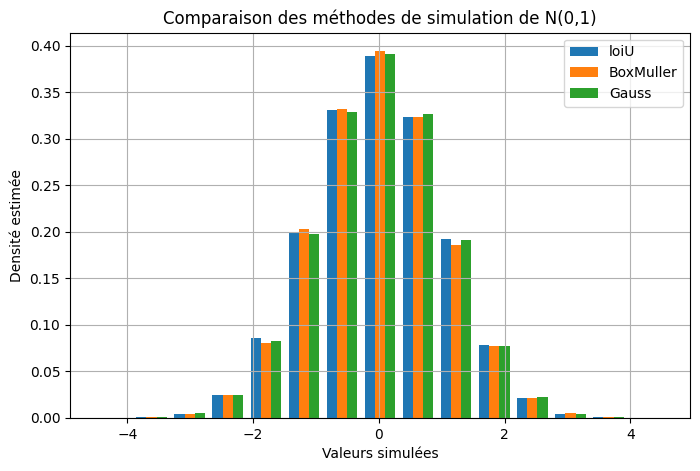

In [28]:
import numpy as np
import matplotlib.pyplot as plt

N = 10**5

data_normal = normale_numpy(N)
data_loiU = loiU(N)
data_box = BoxMuller(N)

plt.figure(figsize=(8, 5))

# Superposition des trois histogrammes
plt.hist([loiU(N),BoxMuller(N),normale_numpy(N)],
bins=15,density=True,
label=["loiU","BoxMuller","Gauss"])

# Courbe de densit√© th√©orique (optionnel)
# x = np.linspace(-5, 5, 500)
# f_theorique = (1/np.sqrt(2*np.pi)) * np.exp(-x**2 / 2)
# plt.plot(x, f_theorique, 'k--', label='Densit√© normale th√©orique')

# Personnalisation
plt.title("Comparaison des m√©thodes de simulation de N(0,1)")
plt.xlabel("Valeurs simul√©es")
plt.ylabel("Densit√© estim√©e")
plt.legend()
plt.grid(True)
plt.show()


### Exercice 8 : Simulation de la loi de Pareto

La **loi de Pareto** de param√®tres $x_{\min} \in \mathbb{R}^+$ et $k \in \mathbb{N}^*$ est une loi continue dont la densit√© est donn√©e par :

$$
f(x) = 
\begin{cases}
0 & \text{si } x < x_{\min} \\
\dfrac{k x_{\min}^k}{x^{k+1}} & \text{si } x \ge x_{\min}
\end{cases}
$$

---

On souhaite observer que cette loi peut √™tre simul√©e √† partir de la loi uniforme continue sur $[0, 1]$, selon la m√©thode suivante :

> Soit $(X_1, ..., X_k)$ un √©chantillon de la loi uniforme sur $[0, 1]$,
> alors la variable :

$$
Y = \frac{x_{\min}}{\max(X_1, ..., X_k)}
$$

suit approximativement la loi de Pareto de param√®tres $x_{\min}$ et $k$.

> ‚ö†Ô∏è On remarque que cette variable est **presque s√ªrement d√©finie**, car :
> $\mathbb{P}(\max(X_1, ..., X_k) = 0) = 0$

---

1. **Simuler la variable al√©atoire $Y$**

   * Prendre $k = 5$, $x_{\min} = 2$

2. **√âcrire une fonction Python** de param√®tres d‚Äôentr√©e $(x_{\min}, k, N)$

   * Cette fonction doit g√©n√©rer un **√©chantillon $E$** de taille $N$, suivant la m√™me loi que $Y$.

3. Supposons maintenant :
   $k = 5$, $x_{\min} = 2$, $N = 10\,000$
   On consid√®re l‚Äô√©chantillon $E$ simul√© comme ci-dessus.

   a) **D√©terminer une borne $\alpha$** telle que l‚Äôintervalle $[0, \alpha]$ contienne **99 % des valeurs** de $E$

   b) **Tracer un histogramme** :

   * R√©partir les valeurs de $E$ en **100 classes**,
   * Sur le **m√™me graphique**, afficher la **courbe de densit√© th√©orique** $f(x)$


#### Correction 1)

In [29]:
import numpy as np

# Param√®tres
k = 5
xmin = 2

# G√©n√©ration d‚Äôun vecteur de k valeurs uniformes
U = np.random.uniform(0, 1, k)

# Calcul de Y
Y = xmin / np.max(U)
print("Une r√©alisation de Y :", Y)

Une r√©alisation de Y : 2.636256175393372


#### Correction 2)

In [30]:
def pareto_simulation(xmin, k, N):
    # G√©n√©rer une matrice N x k de valeurs uniformes
    U = np.random.uniform(0, 1, size=(N, k))
    max_U = np.max(U, axis=1)
    return xmin / max_U

#### Correction 3) a)

In [31]:
import matplotlib.pyplot as plt

# Param√®tres
k = 5
xmin = 2
N = 10_000

# G√©n√©ration de l‚Äô√©chantillon
E = pareto_simulation(xmin, k, N)

# (a) Trouver alpha tel que P(E ‚â§ alpha) ‚âà 0.99
alpha = np.quantile(E, 0.99)
print("Valeur de alpha (99% des E ‚â§ alpha) :", alpha)

Valeur de alpha (99% des E ‚â§ alpha) : 5.084517405161628


#### Correction 3) b)

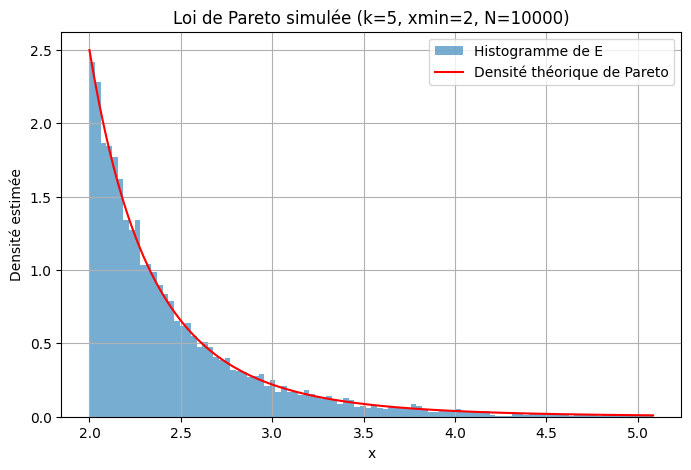

In [32]:
def pareto_density(x, xmin, k):
    f = np.zeros_like(x)
    mask = x >= xmin
    f[mask] = (k * xmin**k) / (x[mask]**(k + 1))
    return f

# Trac√©
x_vals = np.linspace(xmin, alpha, 1000)
f_vals = pareto_density(x_vals, xmin, k)

plt.figure(figsize=(8, 5))
plt.hist(E, bins=100, range=(xmin, alpha), density=True, alpha=0.6, label='Histogramme de E')
plt.plot(x_vals, f_vals, 'r-', label='Densit√© th√©orique de Pareto')
plt.title(f"Loi de Pareto simul√©e (k={k}, xmin={xmin}, N={N})")
plt.xlabel("x")
plt.ylabel("Densit√© estim√©e")
plt.legend()
plt.grid(True)
plt.show()

### Exercice 9 : Simulation de pannes et loi de Poisson

On observe √† partir d‚Äôun instant 0 un syst√®me qui **tombe en panne de fa√ßon al√©atoire**.
Chaque panne est suivie d‚Äôune **r√©paration imm√©diate**.

On note :

* $N_t$ : le **nombre de pannes** survenues jusqu‚Äô√† l‚Äôinstant $t$,
* $S_0 = 0$, $S_1$, $S_2$, ‚Ä¶ : les **dur√©es de fonctionnement** entre deux pannes successives.

On suppose que les $S_n$ sont **ind√©pendantes**, de loi **exponentielle de param√®tre $\lambda > 0$**.

---

On montre alors que pour tout $t \in \mathbb{R}^{+*}$ :

$$
N_t = \max\left\{ n \in \mathbb{N} \ \bigg| \ \sum_{i=0}^{n} S_i \le t \right\}
$$

---

**Simulation directe de $N_t$**

1. √âcrire une fonction **`simulen(t, Œª)`** qui simule une valeur de $N_t$.

2. Construire, √† l‚Äôaide de cette fonction, un √©chantillon de **taille 10‚ÄØ000** de $N_1$ (avec $t = 1$, $Œª = 2$).

3. Estimer la **loi de $N_1$** avec un histogramme (`plt.hist`).


**Estimation par moyenne ‚Äì Loi de Poisson**

> On d√©montre que $N_t$ suit une **loi de Poisson** de param√®tre $Œªt$.

4. √âcrire une fonction **`parametreN(Œª, t, n)`** qui :

   * g√©n√®re un √©chantillon de taille $n$ de $N_t$,
   * retourne une **estimation du param√®tre** $Œªt$ √† partir de la moyenne des valeurs simul√©es.

**√âtude de la d√©pendance en $t$**

> On note $œÜ_Œª(t)$ le **param√®tre de la loi de $N_t$**.

5. Repr√©senter sur un m√™me graphique les courbes $œÜ_1(t), œÜ_2(t), ..., œÜ_5(t)$
   pour $t \in [0, 1]$, avec $n = 1000$ simulations pour chaque point.

6. **Que remarque-t-on ?**


#### Correction 1)

In [33]:
def simulen(t, lambd):
    S = 0
    n = 0
    while S <= t:
        S += np.random.exponential(1 / lambd)
        n += 1
    return n - 1  # on d√©passe t √† la derni√®re it√©ration

#### Correction 2)

In [34]:
N = 10_000
lambd = 2
t = 1

echantillon = [simulen(t, lambd) for _ in range(N)]

#### Correction 3)

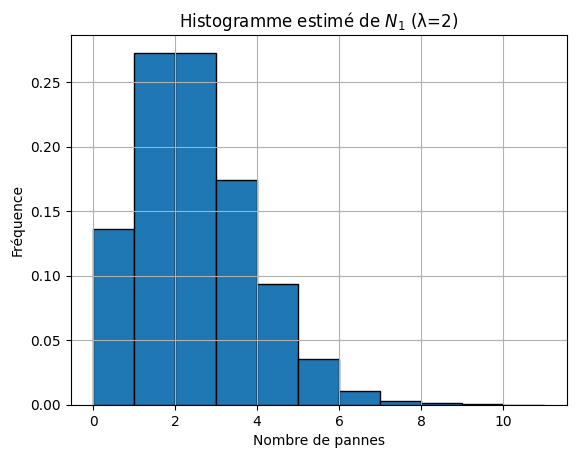

In [35]:
import matplotlib.pyplot as plt

plt.hist(echantillon, bins=range(min(echantillon), max(echantillon)+2), edgecolor='black', density=True)
plt.title("Histogramme estim√© de $N_1$ (Œª=2)")
plt.xlabel("Nombre de pannes")
plt.ylabel("Fr√©quence")
plt.grid(True)
plt.show()

#### Correction 4)

In [36]:
def parametreN(lambd, t, n):
    echantillon = [simulen(t, lambd) for _ in range(n)]
    return np.mean(echantillon)

estimation = parametreN(2, 1, 10_000)
print("Estimation du param√®tre Œªt =", estimation)

Estimation du param√®tre Œªt = 2.0063


#### Correction 5)

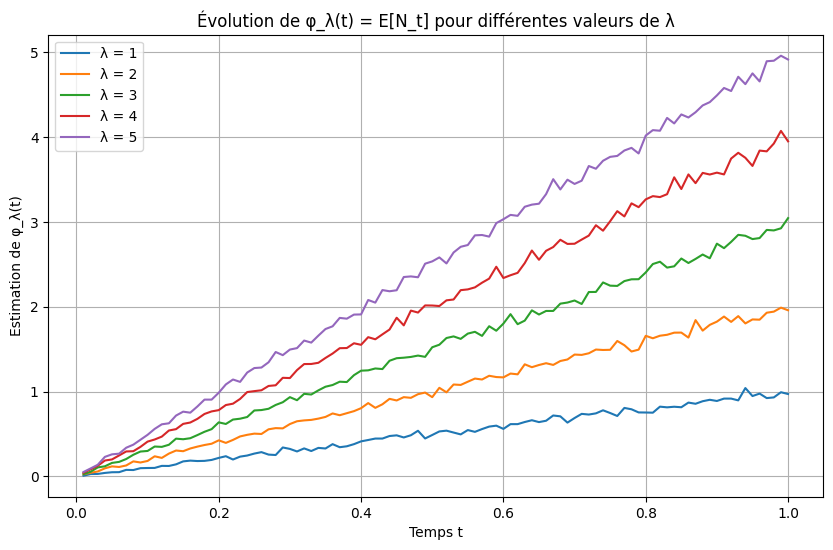

In [37]:
t_values = np.linspace(0.01, 1, 100)  # √©viter t = 0 pour √©viter boucle infinie
n = 1000  # taille de l‚Äô√©chantillon pour chaque t
lambdas = [1, 2, 3, 4, 5]
phi_values = {lambd: [] for lambd in lambdas}

for lambd in lambdas:
    for t in t_values:
        phi = parametreN(lambd, t, n)
        phi_values[lambd].append(phi)

# Trac√© des courbes
plt.figure(figsize=(10, 6))
for lambd in lambdas:
    plt.plot(t_values, phi_values[lambd], label=f"Œª = {lambd}")
plt.xlabel("Temps t")
plt.ylabel("Estimation de œÜ_Œª(t)")
plt.title("√âvolution de œÜ_Œª(t) = E[N_t] pour diff√©rentes valeurs de Œª")
plt.legend()
plt.grid(True)
plt.show()

#### Correction 6)

* Pour chaque Œª, la fonction $œÜ_Œª(t)$ est **presque lin√©aire**, ce qui confirme que :

  $$
  \mathbb{E}[N_t] \approx Œªt
  $$

* Cela illustre que $N_t \sim \text{Poisson}(Œªt)$, c‚Äôest-√†-dire :

  * l'esp√©rance et la variance de $N_t$ sont toutes deux √©gales √† $Œªt$,
  * plus Œª est grand, plus les courbes montent rapidement.



### Exercice 10 : Simulation de tirages sans remise dans une urne

Une urne contient $n$ boules num√©rot√©es de 1 √† $n$.
On tire les boules **sans remise**, une √† une, **jusqu'√† obtenir la boule num√©ro 1**.
On note $X$ le **nombre de boules restant dans l‚Äôurne** au moment o√π la boule 1 est tir√©e.

---

1. √âcrire une fonction `simule_X(n)`

‚Üí Elle doit **simuler la variable $X$**, c‚Äôest-√†-dire le **nombre de boules restantes** au moment o√π la boule n¬∞1 est tir√©e.

> üî∏ Aide :

* Consid√©rer un vecteur contenant les nombres $1, 2, ..., n$ dans l‚Äôordre.
* Le m√©langer avec une fonction de permutation (comme `np.random.shuffle`).
* Chercher la **position de la boule 1** dans cette permutation.
* Le nombre de boules restantes est $n - \text{indice de 1} - 1$.

---

2. R√©p√©ter l'exp√©rience un grand nombre de fois avec $n = 10$

* Simuler de nombreuses r√©alisations de $X$ (ex : 10‚ÄØ000).
* Tracer un **histogramme** de la variable $X$ avec `plt.hist(...)`.
* **Conjecturer la loi de $X$** (forme, r√©gularit√©, probabilit√© constante‚ÄØ?).

---

3. √âcrire une fonction `proba(echantillon, n, alpha)`

Cette fonction prend en entr√©e :

* un **√©chantillon** de valeurs simul√©es de $X$,
* le nombre de boules $n$,
* un **niveau de risque** $\alpha \in (0, 1)$.

Et retourne :

* un vecteur `P` d‚Äôestimations de $\mathbb{P}(X = k)$ pour $k = 0, ..., n-1$,
* deux vecteurs `U` et `V` correspondant aux **bornes de l‚Äôintervalle de confiance** asymptotique au **niveau $1 - \alpha$** pour chaque $k$.

> ‚ú≥Ô∏è Format attendu :

```python
def proba(echantillon, n, alpha):
    ...
    return [P, U, V]
```

---

V√©rification de la conjecture

* Utiliser les r√©sultats de `proba(...)` avec :

  * $n = 10$, $N = 10\,000$, $\alpha = 5\%$
* **Comparer les probabilit√©s estim√©es avec l‚Äôallure observ√©e** √† la question 2.



#### Correction 1)

In [38]:
import numpy as np

def simule_X(n):
    boules = np.arange(1, n + 1)
    np.random.shuffle(boules)
    index_1 = np.where(boules == 1)[0][0]
    return n - index_1 - 1

#### Correction 2)

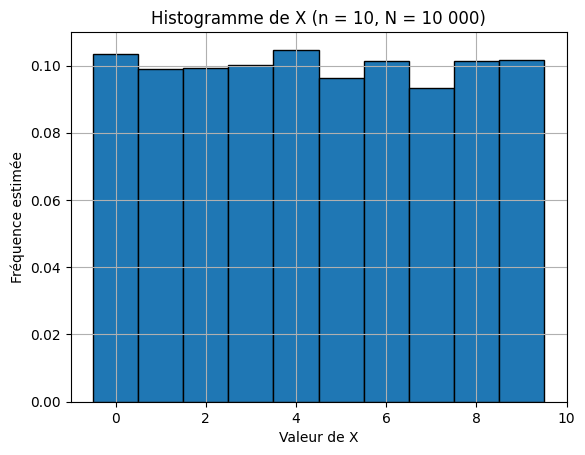

In [39]:
import matplotlib.pyplot as plt

n = 10
N = 10_000

echantillon = [simule_X(n) for _ in range(N)]

plt.hist(echantillon, bins=np.arange(n+1)-0.5, density=True, edgecolor='black')
plt.title("Histogramme de X (n = 10, N = 10 000)")
plt.xlabel("Valeur de X")
plt.ylabel("Fr√©quence estim√©e")
plt.grid(True)
plt.show()

#### Correction 3)

In [40]:
from scipy.stats import norm

def proba(echantillon, n, alpha):
    counts = np.zeros(n)
    
    for val in echantillon:
        if 0 <= val < n:
            counts[val] += 1
    
    P = counts / len(echantillon)
    
    # Intervalle de confiance asymptotique (normal) :
    z = norm.ppf(1 - alpha/2)
    se = np.sqrt(P * (1 - P) / len(echantillon))  # standard error
    
    U = P - z * se
    V = P + z * se
    
    # Ajustement des bornes pour rester dans [0,1]
    U = np.clip(U, 0, 1)
    V = np.clip(V, 0, 1)
    
    return P, U, V

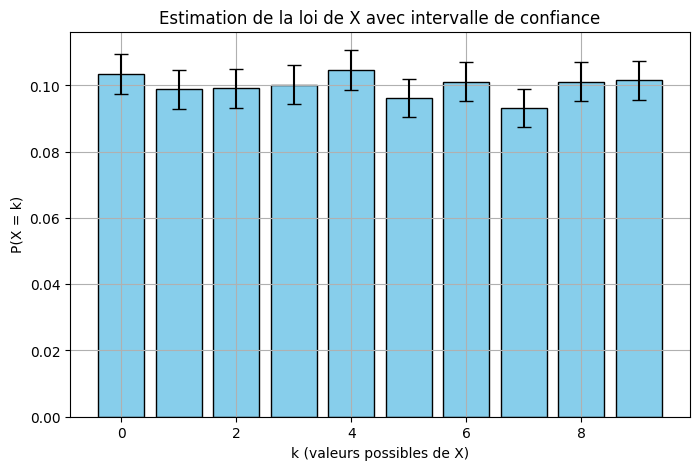

In [41]:
alpha = 0.05
P, U, V = proba(echantillon, n, alpha)

# Affichage des r√©sultats
k_vals = np.arange(n)

plt.figure(figsize=(8,5))
plt.bar(k_vals, P, yerr=[P - U, V - P], capsize=5, color='skyblue', edgecolor='black')
plt.title("Estimation de la loi de X avec intervalle de confiance")
plt.xlabel("k (valeurs possibles de X)")
plt.ylabel("P(X = k)")
plt.grid(True)
plt.show()

**Interpr√©tation :**

* La loi estim√©e de $X$ est **quasi-uniforme** sur $[0, n-1]$,
* Les **intervalles de confiance** sont **√©troits** pour $N = 10\,000$,
* Cela **confirme la conjecture** : $X \sim \mathcal{U}([0, n-1])$.

### Exercice 11 : Marche al√©atoire en une dimension

Un promeneur ivre se d√©place sur une **droite gradu√©e** et orient√©e.
Il part √† un instant 0 du point $O$.
√Ä chaque pas, il se d√©place d‚Äô**une unit√© √† droite ou √† gauche** avec la m√™me probabilit√©.
On note $X_i$ la **position du promeneur apr√®s le $i$-√®me pas**.

---

1. √âcrire une fonction de param√®tre d‚Äôentr√©e $n$, qui retourne le **vecteur $X$** contenant les diff√©rentes positions $X_1, \dots, X_n$.

2. √âcrire une fonction prenant en entr√©e :

* un vecteur $X$,
* un r√©el $r$,

et qui retourne un bool√©en indiquant **si le promeneur s‚Äôest √©cart√© strictement de plus de $r$ unit√©s** de son point de d√©part √† un moment quelconque du trajet.

3. Recommencer **10 000 fois** l‚Äôexp√©rience :

Estimer la **probabilit√© que le promeneur s‚Äô√©loigne strictement de plus de 10 unit√©s** de son point de d√©part au cours des **100 premiers pas**.

4. Reprendre les questions pr√©c√©dentes en supposant maintenant que le promeneur se d√©place dans un **plan** (2D).

√Ä chaque pas, il peut se d√©placer :

* vers le **haut**,
* vers le **bas**,
* vers la **gauche**,
* vers la **droite**,

avec la **m√™me probabilit√©**.

Apr√®s $k$ d√©placements, le promeneur est rep√©r√© par ses coordonn√©es $(x(k), y(k))$.
La **distance √† l‚Äôorigine** est donn√©e par la formule :

$$
d = \sqrt{x^2 + y^2}
$$


#### Correction 1)

In [42]:
def marche_1D(n):
    pas = np.random.choice([-1, 1], size=n)
    position = np.cumsum(pas)
    return position  # retourne X‚ÇÅ, X‚ÇÇ, ..., X‚Çô

#### Correction 2)

In [43]:
def ecart_depasse(X, r):
    return np.any(np.abs(X) > r)

#### Correction 3)

In [44]:
N = 10_000
n = 100
r = 10

comptage = 0
for _ in range(N):
    X = marche_1D(n)
    if ecart_depasse(X, r):
        comptage += 1

proba = comptage / N
print(f"Probabilit√© de s‚Äô√©loigner strictement de plus de {r} unit√©s en {n} pas ‚âà {proba:.4f}")

Probabilit√© de s‚Äô√©loigner strictement de plus de 10 unit√©s en 100 pas ‚âà 0.5466


#### Correction 4)

In [45]:
def marche_2D(n):
    # mouvements : haut, bas, gauche, droite
    directions = {
        0: (0, 1),   # haut
        1: (0, -1),  # bas
        2: (-1, 0),  # gauche
        3: (1, 0),   # droite
    }

    choix = np.random.choice([0, 1, 2, 3], size=n)
    x, y = [0], [0]

    for c in choix:
        dx, dy = directions[c]
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)

    return np.array(x[1:]), np.array(y[1:])  # sans le point initial (0,0)


def ecart_depasse_2D(x, y, r):
    distances = np.sqrt(x**2 + y**2)
    return np.any(distances > r)


comptage_2D = 0

for _ in range(N):
    x, y = marche_2D(n)
    if ecart_depasse_2D(x, y, r):
        comptage_2D += 1

proba_2D = comptage_2D / N
print(f"Probabilit√© 2D de d√©passer {r} unit√©s en {n} pas ‚âà {proba_2D:.4f}")

# En g√©n√©ral, la probabilit√© de s‚Äô√©loigner d‚Äôune certaine distance est plus faible en 2D qu‚Äôen 1D pour un m√™me nombre de pas, car les directions sont r√©parties sur plus d‚Äôaxes.



Probabilit√© 2D de d√©passer 10 unit√©s en 100 pas ‚âà 0.5894


### Exercice 12 : Mod√®le de Black-Scholes

Dans le mod√®le de Black-Scholes, la valeur d‚Äôune option est donn√©e par la formule :

$$
C_0 = e^{-rT} \mathbb{E} \left( \max\left(S_0 e^{(r - \frac{1}{2} \sigma^2)T + \sigma \sqrt{T} U} - K, 0 \right) \right)
$$

* $r = \ln(1 + R)$, avec $R$ le **taux d‚Äôint√©r√™t sans risque**.
* $\sigma$ est la **volatilit√©** du sous-jacent.
* $U \sim \mathcal{N}(0, 1)$ est une **variable al√©atoire normale centr√©e r√©duite**.
* $S_0$ est le **cours initial**, $K$ le **prix d‚Äôexercice**, et $T$ la **maturit√©**.

---

On d√©finit les variables :

$$
S = S_0 e^{(r - \frac{1}{2} \sigma^2)T + \sigma \sqrt{T} U}, \quad C = \max(S - K, 0)
$$

On prendra :

* $S_0 = K = 100$,
* $T = \frac{1}{4}$ (un trimestre),
* $R = 2\%$.

---
1. √âcrire une fonction **`echantillon(S0, K, T, œÉ, R)`**

‚Üí qui retourne 10‚ÄØ000 valeurs de la variable al√©atoire **$S$** et de **$C$**.

---
2. Tracer l‚Äô**histogramme** des valeurs de $S$ pour :

* $R = 2\%$,
* $\sigma = 0.5$ puis $\sigma = 1$.

Expliquer la diff√©rence entre ces deux instructions :

```python
plt.hist(C, bins=np.arange(0, 200, 5))
plt.hist(C, bins=np.arange(0, 1_200, 5))
```

---
3. Donner une **estimation empirique** de la valeur de l‚Äôoption pour :

* $R = 2\%$,
* $\sigma$ variant de 0 √† 1 par pas de 0.1.

‚Üí Quelle est l‚Äôinfluence de la **volatilit√© $\sigma$** sur le prix de l‚Äôoption ?

---
4. On donne la **formule analytique** exacte du prix de l‚Äôoption :

$$
C_0 = S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2)
$$

avec :

$$
d_1 = \frac{\ln(S_0 / K) + (r + \frac{1}{2} \sigma^2)T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}
$$

o√π $\Phi$ est la **fonction de r√©partition de la loi normale centr√©e r√©duite**.

(a) √âcrire une fonction **`valorisation_option(S0, K, T, œÉ, R)`** qui calcule $C_0$ analytiquement.

(b) **Comparer les r√©sultats** de cette formule √† ceux obtenus √† la question 3.

#### Correction 1)

In [46]:
def echantillon(S0, K, T, sigma, R, N=10000):
    r = np.log(1 + R)
    U = np.random.normal(0, 1, N)
    S = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * U)
    C = np.maximum(S - K, 0)
    return S, C

#### Correction 2)

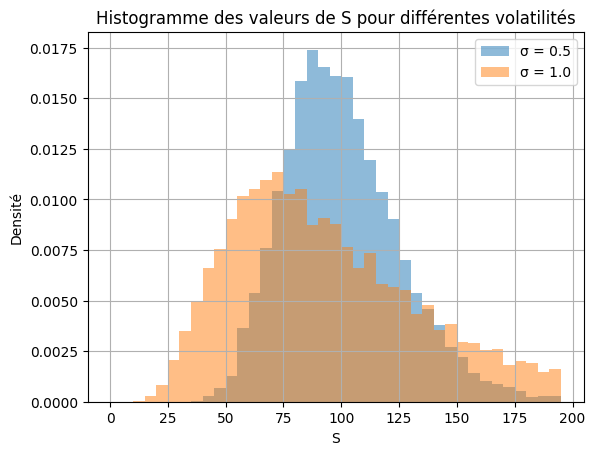

In [47]:
import matplotlib.pyplot as plt

# Param√®tres
S0 = K = 100
T = 0.25
R = 0.02
N = 10000

# Cas sigma = 0.5
S1, C1 = echantillon(S0, K, T, sigma=0.5, R=R, N=N)

# Cas sigma = 1
S2, C2 = echantillon(S0, K, T, sigma=1, R=R, N=N)

plt.hist(S1, bins=np.arange(0, 200, 5), alpha=0.5, label="œÉ = 0.5", density=True)
plt.hist(S2, bins=np.arange(0, 200, 5), alpha=0.5, label="œÉ = 1.0", density=True)
plt.title("Histogramme des valeurs de S pour diff√©rentes volatilit√©s")
plt.xlabel("S")
plt.ylabel("Densit√©")
plt.legend()
plt.grid(True)
plt.show()

#### Correction 3)

In [48]:
sigmas = np.arange(0, 1.1, 0.1)
prix_estimes = []

for sigma in sigmas:
    _, C = echantillon(100, 100, 0.25, sigma, 0.02)
    prix_estimes.append(np.mean(C))

#### Correction 4) a)

In [49]:
def valorisation_option(S0, K, T, sigma, R):
    r = np.log(1 + R)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T)) if sigma > 0 else np.inf
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

#### Correction 4) b)

In [50]:
prix_exacts = [valorisation_option(100, 100, 0.25, sigma, 0.02) for sigma in sigmas]

# Comparaison (texte)
resultats = list(zip(sigmas, prix_estimes, prix_exacts))
for s, est, exact in resultats:
    print(f"sigma = {s:.1f} | estim√© = {est:.4f} | exact = {exact:.4f}")

sigma = 0.0 | estim√© = 0.4963 | exact = 0.4938
sigma = 0.1 | estim√© = 2.2331 | exact = 2.2462
sigma = 0.2 | estim√© = 4.2068 | exact = 4.2297
sigma = 0.3 | estim√© = 6.3902 | exact = 6.2139
sigma = 0.4 | estim√© = 8.0158 | exact = 8.1952
sigma = 0.5 | estim√© = 10.0966 | exact = 10.1719
sigma = 0.6 | estim√© = 11.9746 | exact = 12.1426
sigma = 0.7 | estim√© = 14.4272 | exact = 14.1060
sigma = 0.8 | estim√© = 16.0335 | exact = 16.0609
sigma = 0.9 | estim√© = 18.5008 | exact = 18.0061
sigma = 1.0 | estim√© = 20.4347 | exact = 19.9404
